In [1]:
%matplotlib inline
from matplotlib import rc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import matplotlib.patches as patches
import os
from itertools import izip
from tqdm import trange, tqdm_notebook
import operator

In [69]:
df = pd.read_table(
    '/home/bay001/projects/eric_clip_paper_20180120/permanent_data/bar_plot/inputs/ALLDATASETS_submittedonly.txt.top5genes_excessreads.csv',
    names=[
        'uID','RBP','Cell','e1','e2','e3','e4','e5','v1','v2','v3','v4','v5'
    ]
)
# del df['Cell']
levels = list(df['RBP'])
df.set_index(['RBP','Cell','uID'], inplace=True)
df.head()

e1  \
RBP     Cell  uID                                       
HNRNPC  HepG2 203_01                ENSG00000147257.9   
              203_02  lncRNA|NEAT1||ENSG00000245532.4   
RBFOX2  HepG2 204_01  lncRNA|NEAT1||ENSG00000245532.4   
              204_02                ENSG00000140807.4   
IGF2BP1 HepG2 205_01                ENSG00000084674.9   

                                                   e2  \
RBP     Cell  uID                                       
HNRNPC  HepG2 203_01  lncRNA|NEAT1||ENSG00000245532.4   
              203_02                ENSG00000075420.8   
RBFOX2  HepG2 204_01                ENSG00000140807.4   
              204_02  lncRNA|NEAT1||ENSG00000245532.4   
IGF2BP1 HepG2 205_01               ENSG00000115414.14   

                                                   e3  \
RBP     Cell  uID                                       
HNRNPC  HepG2 203_01                ENSG00000075420.8   
              203_02                ENSG00000147257.9   
RBFOX2  HepG2 204_01               ENSG00000155093.13   
              204_02               ENSG00000155093.13   
IGF2BP1 HepG2 205_01  lncRNA|NEAT1||ENSG00000245532.4   

                                                    e4  \
RBP     Cell  uID                                        
HNRNPC  HepG2 203_01  ENSG00000251562.3||lncRNA|MALAT1   
              203_02  ENSG00000251562.3||lncRNA|MALAT1   
RBFOX2  HepG2 204_01                ENSG00000068078.13   
              204_02                ENSG00000068024.12   
IGF2BP1 HepG2 205_01                ENSG00000175899.10   

                                                            e5       v1  \
RBP     Cell  uID                                                         
HNRNPC  HepG2 203_01                        ENSG00000186153.12  0.71806   
              203_02                        ENSG00000152818.14  1.79440   
RBFOX2  HepG2 204_01                         ENSG00000185269.7  3.55994   
              204_02                        ENSG00000068078.13  2.35028   
IGF2BP1 HepG2 205_01  lncRNA|lnc-TMEM167B-1||ENSG00000270066.2  6.72686   

                           v2       v3       v4       v5  
RBP     Cell  uID                                         
HNRNPC  HepG2 203_01  0.68345  0.52396  0.35654  0.28708  
              203_02  0.75586  0.43070  0.37365  0.36999  
RBFOX2  HepG2 204_01  2.42879  2.00226  1.29777  1.24558  
              204_02  2.11764  1.39504  1.08142  1.07901  
IGF2BP1 HepG2 205_01  6.51941  2.69489  2.34468  1.26831

In [71]:
df.index.levels[2]

Index([u'203_01', u'203_02', u'204_01', u'204_02', u'205_01', u'205_02',
       u'206_01', u'206_02', u'209_01', u'209_02',
       ...
       u'682_01', u'682_02', u'684_01', u'684_02', u'693_01', u'693_02',
       u'695_01', u'695_02', u'696_01', u'696_02'],
      dtype='object', name=u'uID', length=362)

In [77]:
def group_and_order_replicates(df, order):
    """
    Sort by alphabetically by RBP name but keep the label
    average across the RBP not just uid
    """
    alphabetical = list(df.index.levels[0])  # TODO: implement alphabetical ordering
    return df.reindex(labels=alphabetical, level=0)

group_and_order_replicates(df, None)

e1  \
RBP     Cell  uID                                                     
AARS    K562  624_01               ENSG00000251562.3||lncRNA|MALAT1   
              624_02                              ENSG00000210082.2   
AGGF1   K562  537_01               ENSG00000251562.3||lncRNA|MALAT1   
              537_02               ENSG00000251562.3||lncRNA|MALAT1   
        HepG2 543_01                             ENSG00000167244.13   
              543_02                             ENSG00000167244.13   
AKAP8L  K562  425_01                              ENSG00000210082.2   
              425_02                              ENSG00000210082.2   
AUH     K562  246_01                              ENSG00000210082.2   
              246_02                              ENSG00000210082.2   
        HepG2 280_01                              ENSG00000210082.2   
              280_02                              ENSG00000210082.2   
BCCIP   HepG2 230_01       lncRNA|lnc-TMEM167B-1||ENSG00000270066.2   
              230_02                lncRNA|NEAT1||ENSG00000245532.4   
BUD13   HepG2 497_01                              ENSG00000210082.2   
              497_02                              ENSG00000210082.2   
        K562  508_01               ENSG00000251562.3||lncRNA|MALAT1   
              508_02               ENSG00000251562.3||lncRNA|MALAT1   
CDC40   HepG2 556_01                             ENSG00000167244.13   
              556_02                             ENSG00000167244.13   
CPSF6   K562  258_01               ENSG00000251562.3||lncRNA|MALAT1   
              258_02               ENSG00000251562.3||lncRNA|MALAT1   
CSTF2   HepG2 572_01                lncRNA|NEAT1||ENSG00000245532.4   
              572_02                lncRNA|NEAT1||ENSG00000245532.4   
CSTF2T  K562  275_01               ENSG00000251562.3||lncRNA|MALAT1   
              275_02               ENSG00000251562.3||lncRNA|MALAT1   
        HepG2 292_01                lncRNA|NEAT1||ENSG00000245532.4   
              292_02                lncRNA|NEAT1||ENSG00000245532.4   
DDX20   HepG2 390x4000_01           lncRNA|NEAT1||ENSG00000245532.4   
              390x4000_02                         ENSG00000210082.2   
...                                                             ...   
U2AF2   HepG2 272_01                lncRNA|NEAT1||ENSG00000245532.4   
              272_02                lncRNA|NEAT1||ENSG00000245532.4   
UCHL5   HepG2 629_01                              ENSG00000210082.2   
              629_02                              ENSG00000084674.9   
        K562  610_01               ENSG00000251562.3||lncRNA|MALAT1   
              610_02               ENSG00000251562.3||lncRNA|MALAT1   
UPF1    K562  465_01                              ENSG00000099194.5   
              465_02                              ENSG00000099194.5   
XPO5    HepG2 655_01                             ENSG00000167244.13   
              655_02                             ENSG00000167244.13   
XRCC6   HepG2 311_01                              ENSG00000210082.2   
              311_02                              ENSG00000210082.2   
        K562  480_01               ENSG00000251562.3||lncRNA|MALAT1   
              480_02               ENSG00000251562.3||lncRNA|MALAT1   
XRN2    K562  245_01                lncRNA|NEAT1||ENSG00000245532.4   
              245_02               ENSG00000251562.3||lncRNA|MALAT1   
        HepG2 235x4000_01           lncRNA|NEAT1||ENSG00000245532.4   
              235x4000_02      ENSG00000263934.2||lncRNA|lnc-EPN2-3   
YBX3    K562  551_01                              ENSG00000270123.2   
              551_02                              ENSG00000270123.2   
YWHAG   K562  367_01               ENSG00000251562.3||lncRNA|MALAT1   
              367_02               ENSG00000251562.3||lncRNA|MALAT1   
ZC3H11A HepG2 641_01                lncRNA|NEAT1||ENSG00000245532.4   
              641_02                lncRNA|NEAT1||ENSG00000245532.4   
        K562  684_

In [3]:
def get_all_e_valuecounts(df):
    return pd.concat([df['e1'],df['e2'],df['e3'],df['e4'],df['e5']], axis=0).value_counts()
    
def get_elements_to_color(df, min_occurrence=50):
    
    """
    returns dictionary of elements to color
    min_occurrence : number of occurrences an element must have among all RBPs in e1
    """
    f = open('/projects/ps-yeolab3/bay001/reference_data/misc_ENCODE/color_list_269.lines', 'r')
    # do we sort by counts?
    f.readline() # i don't like black
    e1counts = df['e1'].value_counts()
    # do we count all e's?
    ecounts = get_all_e_valuecounts(df)
    
    counts = pd.DataFrame(ecounts[ecounts >= min_occurrence])
    counts['color'] = counts[0].apply(lambda x: f.readline().rstrip())
    f.close()
    return counts[['color']]

elements = get_elements_to_color(df)
elements

,color
ENSG00000210082.2,#FFFF00
ENSG00000251562.3||lncRNA|MALAT1,#1CE6FF
ENSG00000211459.2,#FF34FF
lncRNA|NEAT1||ENSG00000245532.4,#FF4A46
ENSG00000167244.13,#008941


In [4]:
# df['label'] = df.apply(lambda x: "{}_{}_{}".format(x['uID'],x['RBP'],x['Cell']), axis=1)
# df.set_index('label', inplace=True)
dx_names = df[['e1','e2','e3','e4','e5']]
dx_values = df[['v1','v2','v3','v4','v5']]
dx_names.head()

e1  \
RBP     uID                                       
HNRNPC  203_01                ENSG00000147257.9   
        203_02  lncRNA|NEAT1||ENSG00000245532.4   
RBFOX2  204_01  lncRNA|NEAT1||ENSG00000245532.4   
        204_02                ENSG00000140807.4   
IGF2BP1 205_01                ENSG00000084674.9   

                                             e2  \
RBP     uID                                       
HNRNPC  203_01  lncRNA|NEAT1||ENSG00000245532.4   
        203_02                ENSG00000075420.8   
RBFOX2  204_01                ENSG00000140807.4   
        204_02  lncRNA|NEAT1||ENSG00000245532.4   
IGF2BP1 205_01               ENSG00000115414.14   

                                             e3  \
RBP     uID                                       
HNRNPC  203_01                ENSG00000075420.8   
        203_02                ENSG00000147257.9   
RBFOX2  204_01               ENSG00000155093.13   
        204_02               ENSG00000155093.13   
IGF2BP1 205_01  lncRNA|NEAT1||ENSG00000245532.4   

                                              e4  \
RBP     uID                                        
HNRNPC  203_01  ENSG00000251562.3||lncRNA|MALAT1   
        203_02  ENSG00000251562.3||lncRNA|MALAT1   
RBFOX2  204_01                ENSG00000068078.13   
        204_02                ENSG00000068024.12   
IGF2BP1 205_01                ENSG00000175899.10   

                                                      e5  
RBP     uID                                               
HNRNPC  203_01                        ENSG00000186153.12  
        203_02                        ENSG00000152818.14  
RBFOX2  204_01                         ENSG00000185269.7  
        204_02                        ENSG00000068078.13  
IGF2BP1 205_01  lncRNA|lnc-TMEM167B-1||ENSG00000270066.2

In [5]:
def get_color(rbp, rep, vcol, elements=elements, dx_names=dx_names):
    greys = ['#DCDCDC','#D3D3D3','#C0C0C0','#A9A9A9','#808080'] # light to dark grey
    name2value = {'v1':'e1','v2':'e2','v3':'e3','v4':'e4','v5':'e5'}
    element = dx_names.loc[rbp].iloc[rep][name2value[vcol]]
    if element in elements.index:
        return elements.loc[element]['color']
    else:
        return greys[int(vcol.split('v')[1])-1]

In [6]:
"""dx = dy.head()

ax = None
if ax is None:
    ax = plt.gca()

legend_builder = []
legend_labels = []
# for region, color in izip(
#         reversed(dx.columns),
#         sns.color_palette("hls", len(dx.index) + 1)
# ):
for v in reversed(['v1','v2','v3','v4','v5']):
    color = 'grey'
    rbp = np.array(
        dx.index
    )
    sns.barplot(
        rbp,
        y=dx[v], color=color, ax=ax
    )

    legend_builder.append(
        plt.Rectangle((0, 0), .25, .25, fc=color, edgecolor='none')
    )
    legend_labels.append(rbp)

    
sns.despine(ax=ax, left=True)"""

'dx = dy.head()\n\nax = None\nif ax is None:\n    ax = plt.gca()\n\nlegend_builder = []\nlegend_labels = []\n# for region, color in izip(\n#         reversed(dx.columns),\n#         sns.color_palette("hls", len(dx.index) + 1)\n# ):\nfor v in reversed([\'v1\',\'v2\',\'v3\',\'v4\',\'v5\']):\n    color = \'grey\'\n    rbp = np.array(\n        dx.index\n    )\n    sns.barplot(\n        rbp,\n        y=dx[v], color=color, ax=ax\n    )\n\n    legend_builder.append(\n        plt.Rectangle((0, 0), .25, .25, fc=color, edgecolor=\'none\')\n    )\n    legend_labels.append(rbp)\n\n    \nsns.despine(ax=ax, left=True)'

In [25]:
def plot_top5_elements_bound(d2x, colordict, out_file):
    """
    Plots bar chart that is ordered individually by percentage
    """
    y = 0 # local counter for rep
    a = 0 # counter for x-axis
    prev = d2x.index[0][0] # the first name of the outer index
    # o = open(out_file.replace('.svg','.order'),'w')
    # plt.figure(figsize=(100,25))
    fig, ax = plt.subplots(figsize=(15,5))
    # progress = trange(len(d2x.index) + 1, desc='RBP loop')

    for name, uid in d2x.index:
        means = {}
        if(name != prev): # new rbp found, but continuing to work on prev rbp
            
            for v in d2x.loc[prev]: # i is the region in question (CDS, 3UTR, etc.)
                means[v] = (d2x.loc[prev][v].mean())
            # avg_sorted_values = pd.DataFrame(means.items())
            avg_sorted_values = pd.DataFrame(sorted(means.items(), key=operator.itemgetter(1)))
            avg_sorted_values.set_index(0,inplace=True) # X indices are how we will sort the values
            for rep_num in range(0,y): # rep_num indicates from 0 to the number of reps in an RBP
                
            #     o.write("{}\t".format(prev))
                offset = d2x.loc[prev].iloc[rep_num].sum()
                for v in avg_sorted_values.index:
            #         print(region)
                    color = get_color(prev, rep_num, v)
                    offset = offset - d2x.loc[prev].iloc[rep_num][v]
                    #if(offset < 0):
                    #    print(offset)
                    if(d2x.loc[prev].iloc[rep_num][v]) > 0:
            #             o.write("{}:{},".format(region,d2x.ix[prev].ix[rep_num][region]))
                        ax.bar(a,offset+d2x.loc[prev].iloc[rep_num][v],color=color)
                a = a + 1
            #     o.write('\n')
            y = 0
            prev = name
        y = y + 1
        # progress.update(1)
        
    ### Do the last one separately to capture the last RBP
    for rep_num in range(0,y):
        
        offset =d2x.loc[prev].iloc[rep_num].sum()
        for v in avg_sorted_values.index:
            color = get_color(prev, rep_num, v)
            offset = offset - d2x.loc[prev].iloc[rep_num][v]
            plt.bar(a,offset+d2x.loc[prev].iloc[rep_num][v],color=color)
        a = a + 1
        
    labels = d2x.index.get_level_values(0)
    ax.set_xticks(range(d2x.shape[0]))
    ax.set_xticklabels(labels)
    
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    
    patch = []
    for label, color in elements.to_dict()['color'].iteritems():
        patch.append(patches.Patch(color=color, label=label))

    plt.legend(handles=patch)

    return 0

0

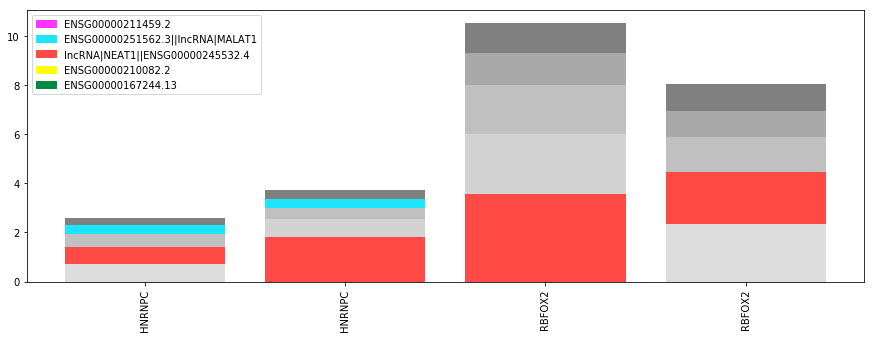

In [24]:
plot_top5_elements_bound(dx_values.head(4), None, None)

In [78]:
def reorder_elements_basedon_mean_2_reps(df, name):
    """
    :param df: pandas.DataFrame
        A multi-indexed dataframe grouped by RBP name and by replicate
    :param name: str
    :return:
    """
    means = {}
    for v in df.loc[name]:  # i is the region in question (CDS, 3UTR, etc.)
        means[v] = (df.loc[name][v].mean())
    print("MEANS",means)
    avg_sorted_values = pd.DataFrame(
        sorted(means.items(), key=operator.itemgetter(1)))
    avg_sorted_values.set_index(0, inplace=True)  # X indices are how we will sort the values
    return avg_sorted_values.index

In [81]:
reorder_elements_basedon_mean_2_reps(dx_values,'HNRNPC')

('MEANS', {'v1': 1.25623, 'v2': 0.71965500000000004, 'v3': 0.47733000000000003, 'v4': 0.365095, 'v5': 0.32853500000000002})


Index([u'v5', u'v4', u'v3', u'v2', u'v1'], dtype='object', name=0)